In [109]:
from nufeb_tools import utils,plot,spatial
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.signal import find_peaks
from scipy.spatial.distance import pdist,squareform
from scipy.spatial import KDTree
from scipy.spatial import Voronoi, voronoi_plot_2d
from pathlib import Path
from tqdm import tqdm
import cv2
import matplotlib as mpl
from joblib import Parallel, delayed, dump,load

In [110]:
DIR = Path(r'E:\scaling\runs')
folders = [path for path in DIR.iterdir() if path.is_dir()]
def collect_data(folder):
    x = utils.get_data(directory=str(folder))
    x.get_mothers()
    return x 
with Parallel(n_jobs=6) as parallel:
    data = parallel(delayed(collect_data)(folder) for folder in folders)


In [111]:
spacing = list()
for d in data:
    spacing.append(d.metadata['Spacing'])
data=[x for _, x in sorted(zip(spacing, data))]
spacing = list()
for d in data:
    spacing.append(d.metadata['Spacing'])
spacing

[6.1e-05,
 6.212705038647812e-05,
 6.452434334661676e-05,
 6.962350626398089e-05,
 8.04696827180752e-05,
 0.00010354004653656654,
 0.00015261187281287938,
 0.00025699011985909803,
 0.00047900791057866693,
 0.000951250938133746]

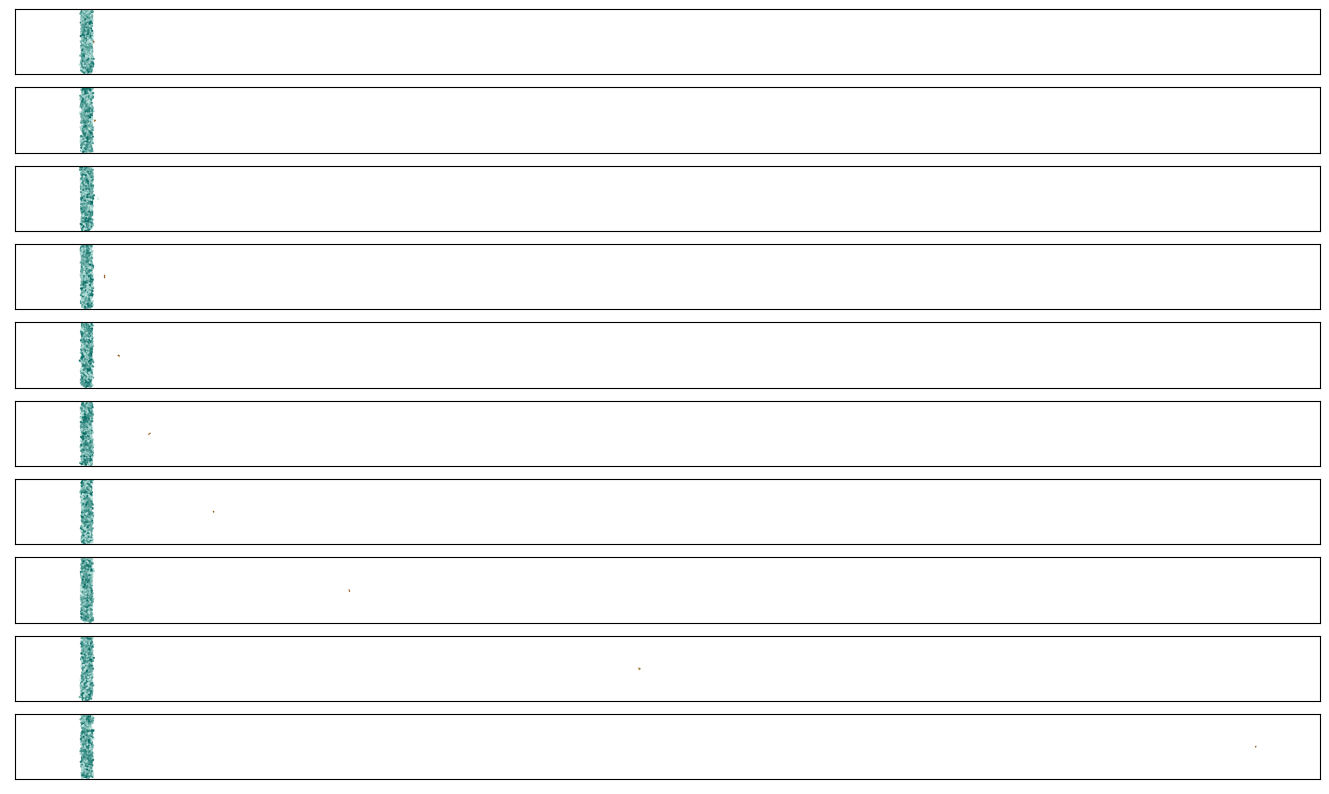

In [118]:
f, axes = plt.subplots(nrows=len(data),figsize=(20,10))
for d,ax in zip(data,axes.ravel()):
    im = plot.colony(d,10000,by='Species',ax=ax)
plt.show()

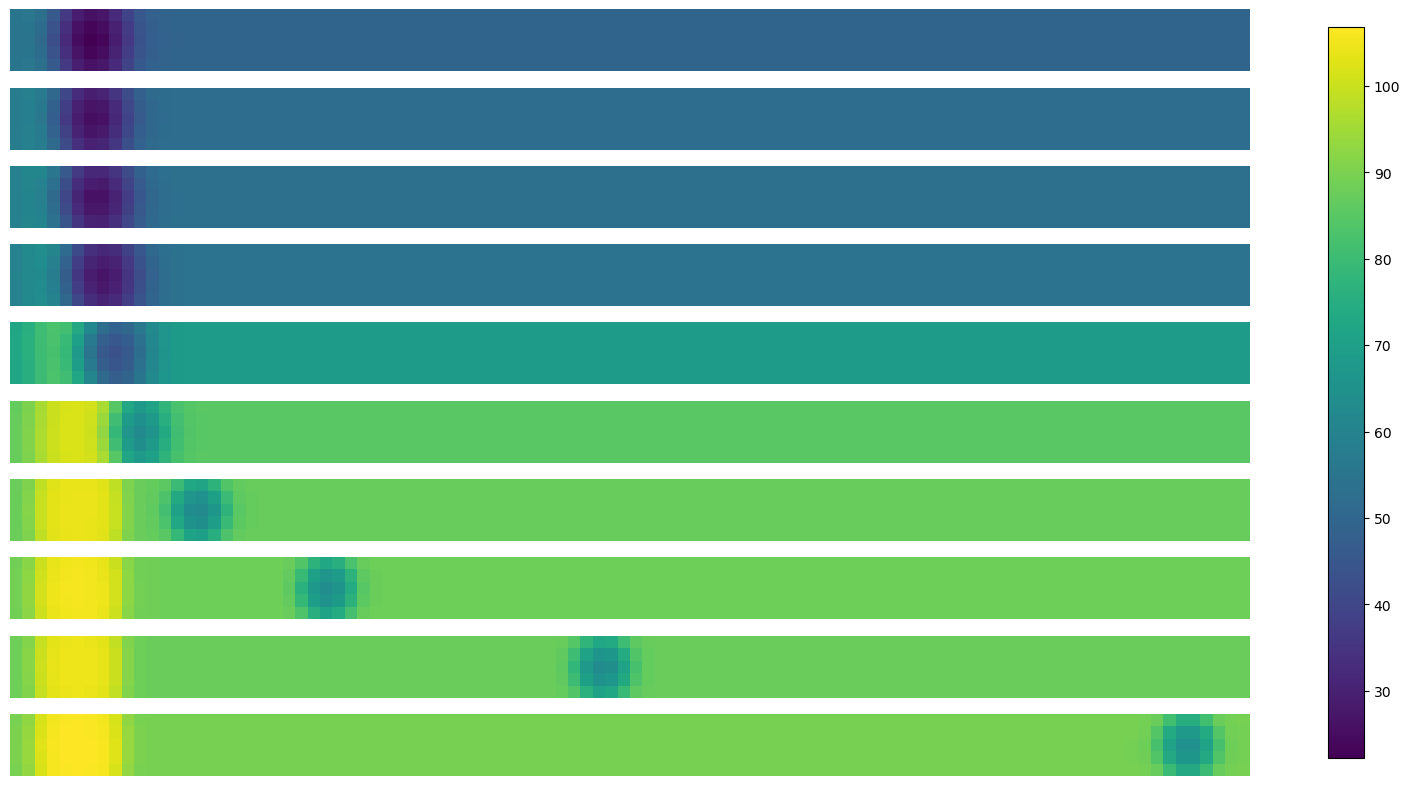

In [113]:
time = 350
s_max = 0
s_min = 100
for d in data:
    grid = d.grid
    suc = np.mean(grid[time,3,:,:,:],axis=1)
    suc_max = suc.max()
    suc_min = suc.min()
    if suc_max > s_max:
        s_max = suc_max
    if suc_min < s_min:
        s_min = suc_min
    #suc = np.mean(suc,axis=1)
f, axes = plt.subplots(nrows=len(data),figsize=(20,10))
for d,ax in zip(data,axes.ravel()):
    dims=d.metadata['Dimensions']
    grid = d.grid
    s = np.mean(grid[time,3,:,:,:],axis=1)
    im = ax.imshow(s,vmin=s_min,vmax=s_max)#,
    ax.set_axis_off()

cbar = f.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)
plt.show()
#cb1 = colorbar(im)

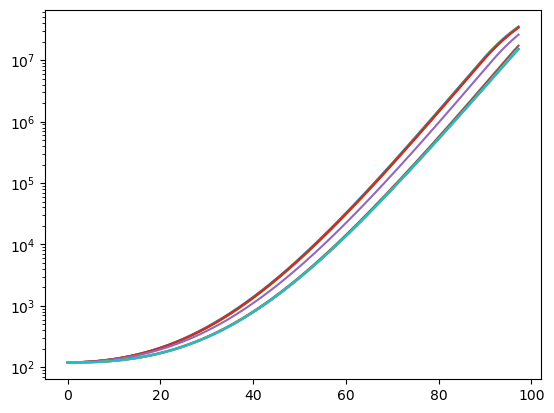

In [114]:
f, ax =plt.subplots()
for d in data:
    ax.plot(d.biomass.ecw)
ax.set_yscale('log')
plt.show()

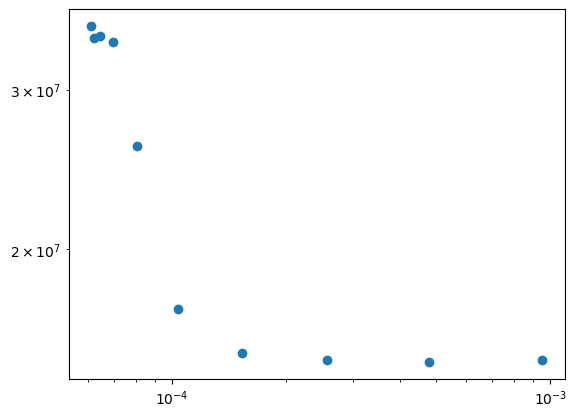

In [115]:
mass_data = list()
f, ax =plt.subplots()
for d in data:
    mass_data.append([d.metadata['Spacing'],d.biomass.ecw.iloc[-1]])
mass_data=pd.DataFrame(mass_data,columns=['Spacing','Biomass'])
ax.scatter(mass_data.Spacing,mass_data.Biomass)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()


In [116]:
np.logspace(-6,-3-.05,10)+6e-5

array([6.10000000e-05, 6.21270504e-05, 6.45243433e-05, 6.96235063e-05,
       8.04696827e-05, 1.03540047e-04, 1.52611873e-04, 2.56990120e-04,
       4.79007911e-04, 9.51250938e-04])

In [117]:
np.log10(6e-5)

-4.221848749616356